### This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

### Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

In [50]:
# import the bank data
import pandas as pd

bank = pd.read_csv("D:\\Machine Learning\\Data sets\\bank-marketing-dataset\\bank.csv")

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


AxesSubplot(0.125,0.125;0.775x0.755)


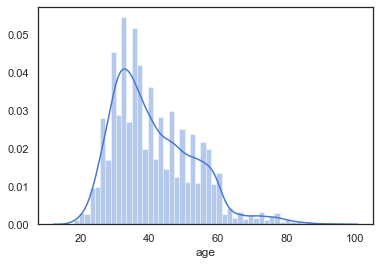

In [51]:
#visualize the data using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



sns.set(style="white", palette="muted", color_codes=True)

print(sns.distplot(bank["age"], kde=True, color="b"))





In [78]:
bank["deposit"].head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


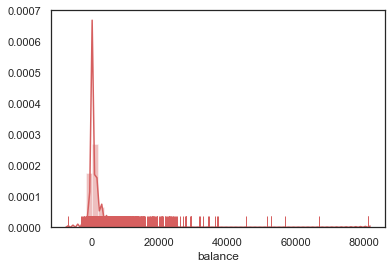

In [52]:
print(sns.distplot(bank["balance"], kde=True, rug=True, color="r"))

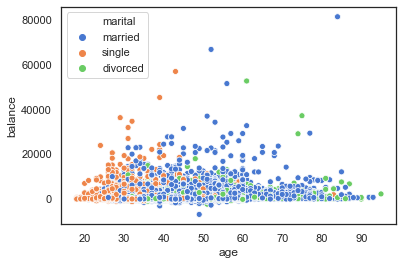

In [53]:
sns.scatterplot(x=bank["age"],y=bank["balance"],hue=bank["marital"],data = bank)

In [59]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

label = LabelEncoder()

bank.head()

#bank["job","marital","education","default","housing","loan","month","poutcome","deposit"]=label.fit_transform(bank[["job","marital","education","default","housing","loan","month","poutcome","deposit"]])

bank["job"] = label.fit_transform(bank["job"])
bank["marital"] = label.fit_transform(bank["marital"])
bank["education"] = label.fit_transform(bank["education"])
bank["default"] = label.fit_transform(bank["default"])
bank["housing"] = label.fit_transform(bank["housing"])
bank["contact"] = label.fit_transform(bank["contact"])
bank["loan"] = label.fit_transform(bank["loan"])
bank["month"] = label.fit_transform(bank["month"])
bank["poutcome"] = label.fit_transform(bank["poutcome"])
bank["deposit"] = label.fit_transform(bank["deposit"])



In [60]:
bank[["job","marital","education","default","housing","loan","month","poutcome","deposit"]]

,job,marital,education,default,housing,loan,month,poutcome,deposit
0,0,1,1,0,1,0,8,3,1
1,0,1,1,0,0,0,8,3,1
2,9,1,1,0,1,0,8,3,1
3,7,1,1,0,1,0,8,3,1
4,0,1,2,0,0,0,8,3,1
...,...,...,...,...,...,...,...,...,...
11157,1,2,0,0,1,0,0,3,0
11158,7,1,1,0,0,0,6,3,0
11159,9,2,1,0,0,0,1,3,0
11160,9,1,1,0,0,1,8,0,0


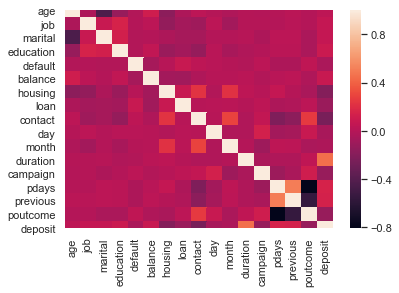

In [61]:
bank.corr()

sns.heatmap(bank.corr())

In [62]:
# defining input and output variables
X = bank.iloc[:,:16]
y = bank["deposit"]

print(X.head())
y.head()



   age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  
0    5      8      1042         1     -1         0         3  
1    5      8      1467         1     -1         0         3  
2    5      8      1389         1     -1         0         3  
3    5      8       579         1     -1         0         3  
4    5      8       673         2     -1         0         3  


0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings("ignore")


scaler = StandardScaler()
X_train, X_test, y_train,y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


svc = SVC()
log_cls = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 5)

svc.fit(X_train,y_train)
log_cls.fit(X_train,y_train)
knn.fit(X_train,y_train)

print("Support Vector Machine accuracy :",cross_val_score(svc,X_test,y_test,cv = 5).mean())
print("Support Vector Machine variance :",cross_val_score(svc,X_test,y_test,cv = 5).std())
print("Logistic regression accuracy :",cross_val_score(log_cls,X_test,y_test,cv = 5).mean())
print("Logistic regression variance :",cross_val_score(log_cls,X_test,y_test,cv = 5).std())
print("KNN accuracy :",cross_val_score(knn,X_test,y_test,cv = 5).mean())
print("KNN variance :",cross_val_score(knn,X_test,y_test,cv = 5).std())

Support Vector Machine accuracy : 0.7980713475988404
Support Vector Machine variance : 0.027926632202759333
Logistic regression accuracy : 0.7792613078577806
Logistic regression variance : 0.029799321412768077
KNN accuracy : 0.7550701066760108
KNN variance : 0.020020313903308776


In [73]:
# Classifying using deep learning

from keras.layers import Dense
from keras.models import Sequential

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)



Epoch 1/100
8929/8929 [==============================] - 4s 412us/step - loss: 0.5350 - accuracy: 0.7515
Epoch 2/100
8929/8929 [==============================] - 2s 277us/step - loss: 0.4395 - accuracy: 0.8056
Epoch 3/100
8929/8929 [==============================] - 3s 386us/step - loss: 0.4328 - accuracy: 0.8080
Epoch 4/100
8929/8929 [==============================] - 4s 431us/step - loss: 0.4273 - accuracy: 0.8102
Epoch 5/100
8929/8929 [==============================] - 2s 264us/step - loss: 0.4242 - accuracy: 0.8087
Epoch 6/100
8929/8929 [==============================] - 3s 295us/step - loss: 0.4196 - accuracy: 0.8130
Epoch 7/100
8929/8929 [==============================] - 2s 237us/step - loss: 0.4175 - accuracy: 0.8134
Epoch 8/100
8929/8929 [==============================] - 3s 318us/step - loss: 0.4160 - accuracy: 0.8163
Epoch 9/100
8929/8929 [==============================] - 2s 252us/step - loss: 0.4141 - accuracy: 0.8192
Epoch 10/100
8929/8929 [==============================]

In [71]:
print(y_pred)

[[False]
 [ True]
 [ True]
 ...
 [False]
 [ True]
 [False]]
